In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data Analysis Project

In [5]:
data= pd.read_excel("C:/Users/dipta/Desktop/Blinkit Python Analysis/BlinkIT Grocery Data (1).xlsx")

Data Structure

In [6]:
data.head

<bound method NDFrame.head of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018    

In [7]:
print('Size of data (Rows, Columns):',data.shape)

Size of data (Rows, Columns): (8523, 12)


In [8]:
print('Columns:',data.columns)

Columns: Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


In [9]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
data.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


Data Preprocessing

In [12]:
#Checking the values in different columns
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [13]:
#replacing the values
data['Item Fat Content'] = data['Item Fat Content'].replace({
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
})
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


 Business Requirements

KPI's

In [14]:
#total sales
totalsales=data['Sales'].sum()

#avg sale
avgsale=data['Sales'].mean()

# no of items sold
itemssold=data['Sales'].count()

#average rating
avgrating=data['Rating'].mean()

print(f'Total Sale: Rs. {totalsales:,.0f}')
print(f'Average Sale: Rs. {avgsale:,.0f}')

print('Items Sold:',itemssold)
print(f'AVerage Rating:  {avgrating:,.0f}')

Total Sale: Rs. 1,201,681
Average Sale: Rs. 141
Items Sold: 8523
AVerage Rating:  4


CHARTS

Item Fat Content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64


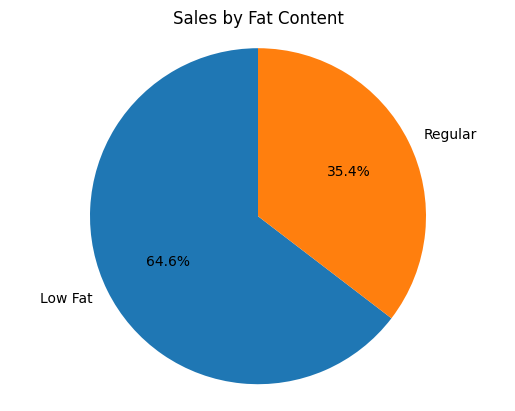

In [15]:
#Total Sale by Fat Content
sales_by_fat= data.groupby('Item Fat Content')['Sales'].sum()
print(sales_by_fat)
plt.pie(sales_by_fat,labels=sales_by_fat.index,
        autopct = '%.1f%%',
        startangle=90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Canned                    90706.7290
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1670
Breads                    35379.1198
Hard Drinks               29334.6806
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


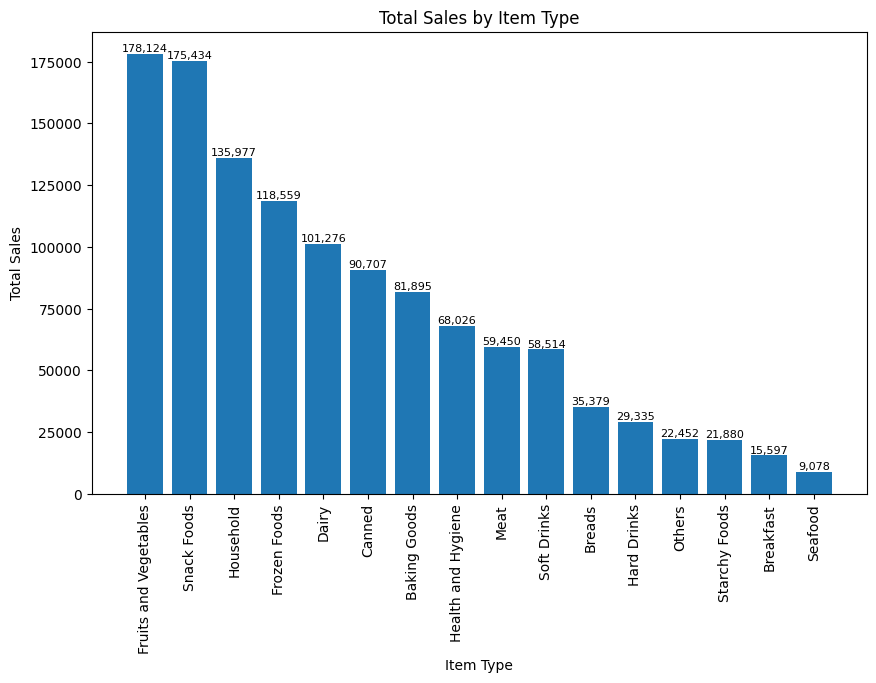

In [16]:
#Total Sale by Item Type
sales_by_item= data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
print(sales_by_item)
plt.figure(figsize=(10,6))
bars= plt.bar(sales_by_item.index,sales_by_item.values)
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel('Total Sales')
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(bar.get_x()+ bar.get_width()/2 , bar.get_height(),
             f'{bar.get_height():,.0f}',ha = 'center',va='bottom',fontsize=8)

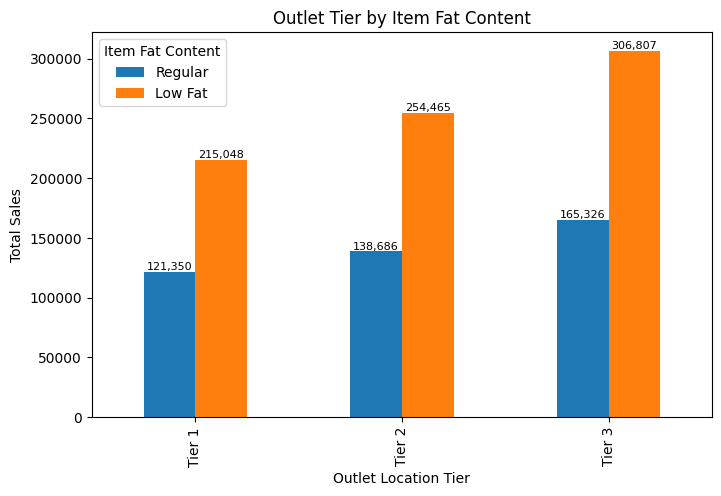

In [17]:
#Fat Content by Outlet For Total Sales
grouped = data.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax=grouped.plot(kind="bar", figsize=(8,5),title= 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')

for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,  
            height,                           
            f'{height:,.0f}',                  
            ha='center',                     
            va='bottom',                      
            fontsize=8                        
        )

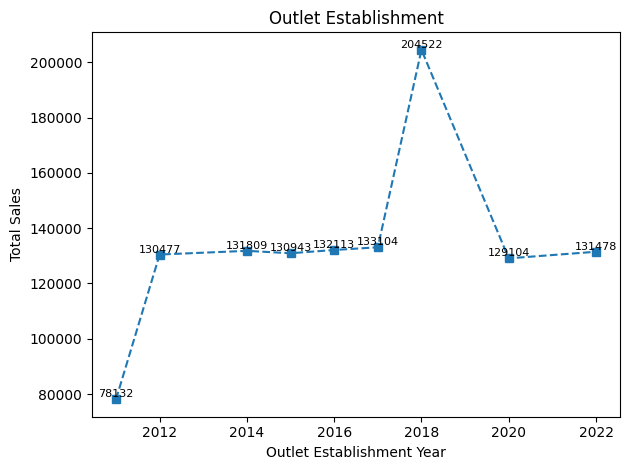

In [18]:
#sales by year of estab of store
sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.plot(sales_by_year.index, sales_by_year.values, marker='s', linestyle='--')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()

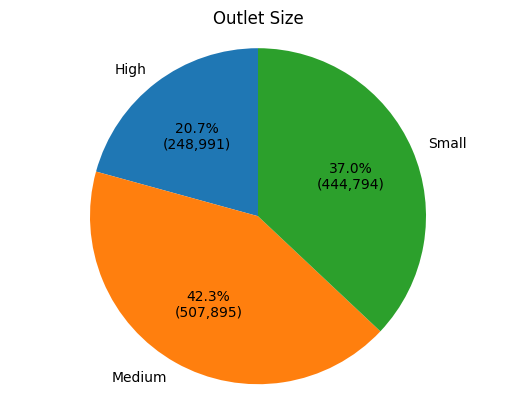

In [23]:
#sales based on outlet size


sales_by_size = data.groupby('Outlet Size')['Sales'].sum()
total = sales_by_size.sum()

plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct * total / 100):,})',
    startangle=90
)
plt.title('Outlet Size')
plt.axis('equal')  # Optional: to make the pie a circle
plt.show()


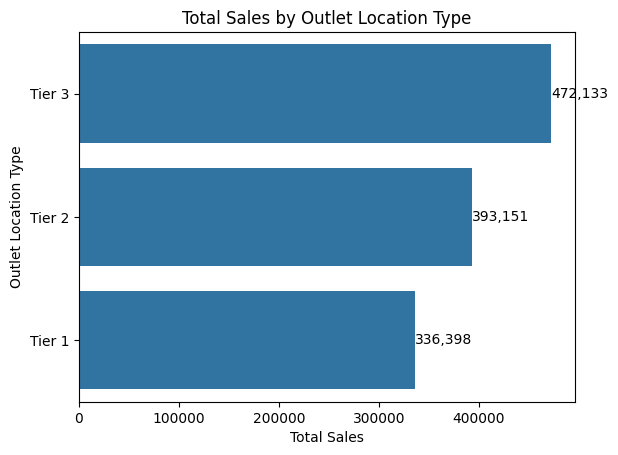

In [20]:
#sales by outlet location
sales_by_location = data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:,.0f}', ha='left', va='center')

Outlet Size           High  Medium  Small
Outlet Location Type                     
Tier 1                   0     930   1458
Tier 2                 588     573   1624
Tier 3                1165    2128     57


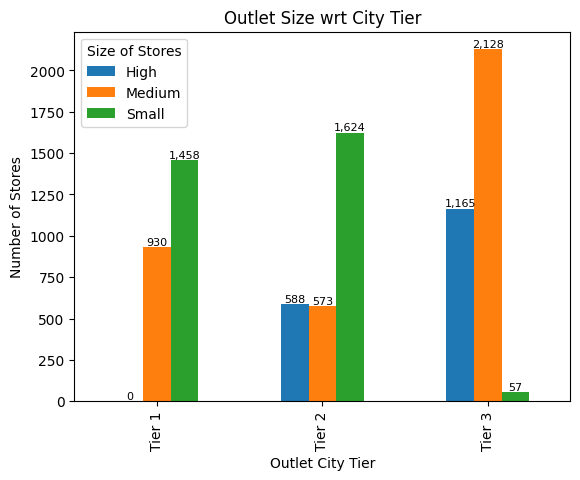

In [32]:
# number of stores in Tier 1 2 3 cities
stores_by_tier = data.groupby(['Outlet Location Type', 'Outlet Size']).size().unstack(fill_value=0)
print(stores_by_tier)
stores_by_tier=stores_by_tier[['High','Medium','Small']]

ax=stores_by_tier.plot(kind="bar",title= 'Outlet Size wrt City Tier')
plt.xlabel('Outlet City Tier')
plt.ylabel('Number of Stores')
plt.legend(title='Size of Stores')

for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,  
            height,                           
            f'{height:,.0f}',                  
            ha='center',                     
            va='bottom',                      
            fontsize=8                        
        )


   Outlet Location Type              Item Type       Sales
6                Tier 1  Fruits and Vegetables  50125.9924
13               Tier 1            Snack Foods  48812.6240
9                Tier 1              Household  37633.6238
29               Tier 2            Snack Foods  57930.7072
22               Tier 2  Fruits and Vegetables  57268.3792
25               Tier 2              Household  44618.7658
38               Tier 3  Fruits and Vegetables  70729.7094
45               Tier 3            Snack Foods  68690.5912
41               Tier 3              Household  53724.1358


C:\Users\dipta\AppData\Local\Temp\ipykernel_15428\333408489.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_tier = grouped.groupby('Outlet Location Type', group_keys=False).apply(


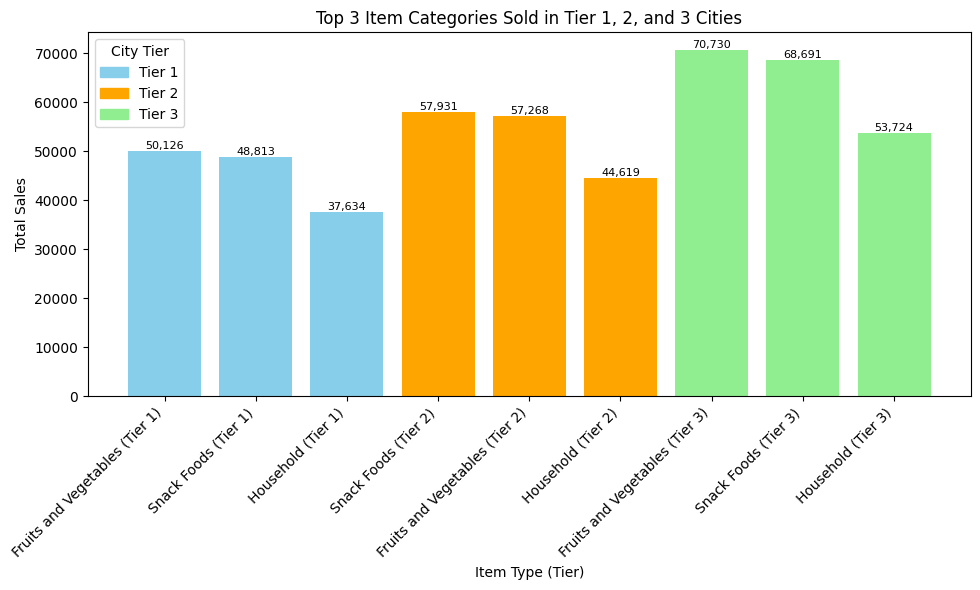

In [ ]:
#top 3 categories sale in all city tiers
import matplotlib.patches as mpatches  # for custom legend


grouped = data.groupby(['Outlet Location Type', 'Item Type'])['Sales'].sum().reset_index()

top_items_by_tier = grouped.groupby('Outlet Location Type', group_keys=False).apply(
    lambda x: x.nlargest(3, 'Sales')
)
print(top_items_by_tier)

plt.figure(figsize=(10, 6))

bar_labels = []
bar_heights = []
colors = []

tier_colors = {'Tier 1': 'skyblue', 'Tier 2': 'orange', 'Tier 3': 'lightgreen'}

for tier in ['Tier 1', 'Tier 2', 'Tier 3']:
    tier_data = top_items_by_tier[top_items_by_tier['Outlet Location Type'] == tier]
    x_labels = tier_data['Item Type'] + f' ({tier})'
    y_values = tier_data['Sales'].values
    bar_labels.extend(x_labels)
    bar_heights.extend(y_values)
    colors.extend([tier_colors[tier]] * len(y_values))


bars = plt.bar(bar_labels, bar_heights, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=0  
    )


legend_handles = [
    mpatches.Patch(color=color, label=tier) for tier, color in tier_colors.items()
]
plt.legend(handles=legend_handles, title='City Tier')

plt.title('Top 3 Item Categories Sold in Tier 1, 2, and 3 Cities')
plt.ylabel('Total Sales')
plt.xlabel('Item Type (Tier)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


   Outlet Location Type      Item Type      Sales
12               Tier 1        Seafood  2866.9244
2                Tier 1      Breakfast  4150.5552
15               Tier 1  Starchy Foods  5419.2726
28               Tier 2        Seafood  2952.3862
18               Tier 2      Breakfast  4847.3002
27               Tier 2         Others  7094.0172
44               Tier 3        Seafood  3258.5594
34               Tier 3      Breakfast  6598.8412
43               Tier 3         Others  7520.8348


C:\Users\dipta\AppData\Local\Temp\ipykernel_15428\2096198315.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_tier = grouped.groupby('Outlet Location Type', group_keys=False).apply(


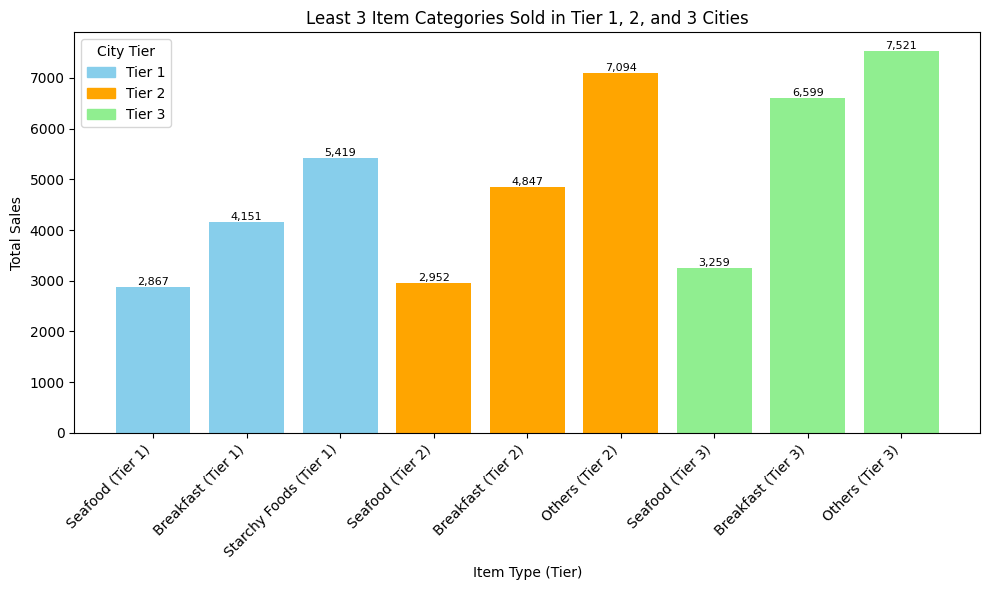

In [52]:
#tbottom 3 categories sale in all city tiers
import matplotlib.patches as mpatches  # for custom legend


grouped = data.groupby(['Outlet Location Type', 'Item Type'])['Sales'].sum().reset_index()

top_items_by_tier = grouped.groupby('Outlet Location Type', group_keys=False).apply(
    lambda x: x.nsmallest(3, 'Sales')
)
print(top_items_by_tier)

plt.figure(figsize=(10, 6))

bar_labels = []
bar_heights = []
colors = []

tier_colors = {'Tier 1': 'skyblue', 'Tier 2': 'orange', 'Tier 3': 'lightgreen'}

for tier in ['Tier 1', 'Tier 2', 'Tier 3']:
    tier_data = top_items_by_tier[top_items_by_tier['Outlet Location Type'] == tier]
    x_labels = tier_data['Item Type'] + f' ({tier})'
    y_values = tier_data['Sales'].values
    bar_labels.extend(x_labels)
    bar_heights.extend(y_values)
    colors.extend([tier_colors[tier]] * len(y_values))


bars = plt.bar(bar_labels, bar_heights, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=0  
    )


legend_handles = [
    mpatches.Patch(color=color, label=tier) for tier, color in tier_colors.items()
]
plt.legend(handles=legend_handles, title='City Tier')

plt.title('Least 3 Item Categories Sold in Tier 1, 2, and 3 Cities')
plt.ylabel('Total Sales')
plt.xlabel('Item Type (Tier)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Outlet Identifier
OUT035    133103.9070
OUT046    132113.3698
OUT013    131809.0156
OUT018    131477.7764
OUT045    130942.7802
Name: Sales, dtype: float64


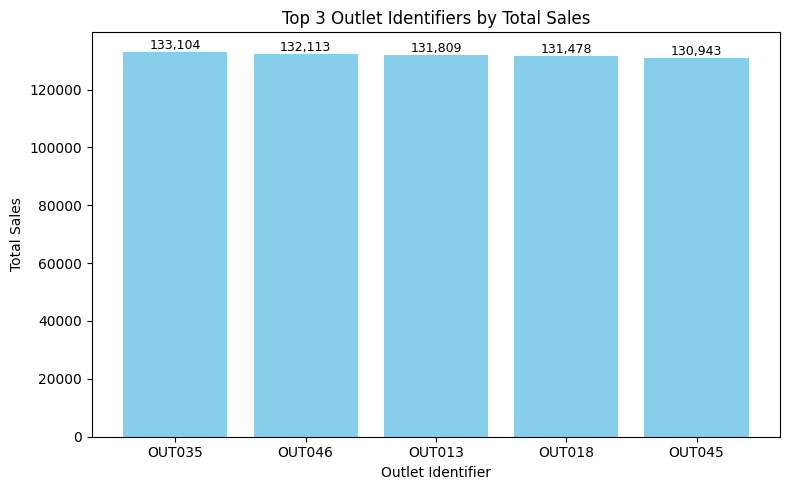

In [ ]:
# top 5 outlets with most sales
sales_by_outlet = data.groupby('Outlet Identifier')['Sales'].sum().sort_values(ascending=False).head(5)
print(sales_by_outlet)

plt.figure(figsize=(8, 5))
bars = plt.bar(sales_by_outlet.index, sales_by_outlet.values, color='skyblue')
plt.xlabel("Outlet Identifier")
plt.ylabel("Total Sales")
plt.title("Top 3 Outlet Identifiers by Total Sales")


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Outlet Location Type
Tier 1    3
Tier 2    3
Tier 3    4
Name: Outlet Identifier, dtype: int64


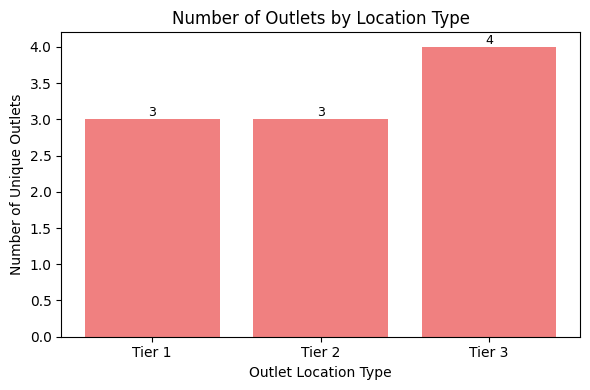

In [ ]:
# number of outlets in each tier of city
outlet_counts = data.drop_duplicates(subset='Outlet Identifier') \
                    .groupby('Outlet Location Type')['Outlet Identifier'] \
                    .count()

print(outlet_counts)


plt.figure(figsize=(6, 4))
bars = plt.bar(outlet_counts.index, outlet_counts.values, color='lightcoral')
plt.xlabel("Outlet Location Type")
plt.ylabel("Number of Unique Outlets")
plt.title("Number of Outlets by Location Type")


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
